# CP_APR Testing

We're going to play with a toy example and then try to produce our own example to test with.

In [1]:
from pyCP_APR import CP_APR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import os.path
import gzip
import shutil
import datetime
import networkx as nx
import pickle
import pyclustering
from scipy import stats
from scipy import sparse
import seaborn as sns
import bz2
import json
import random
random.seed(1134)

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

from IPython.display import clear_output

In [2]:
# creates a list of train and test co-ordinates, along with train and test counts
# the co-ordinates correspond to a sparse matrix which is 0 in most places apart from the locations where we have co-ordinates which correspond to a value

train_coords = list()
train_count = list()

test_coords = list()
test_count = list()

for ii in range(1000):
    train_coords.append(list(np.random.randint(10, size=4)))
    train_count.append(random.randint(1, 20))
    
for ii in range(100):
    test_coords.append(list(np.random.randint(10, size=4)))
    test_count.append(random.randint(1, 20))

In [3]:
# we save a dictionary with our co-ordinates and values in

tensor = dict()
tensor['train_coords'] = train_coords
tensor['train_count'] = train_count
tensor['test_coords'] = test_coords
tensor['test_count'] = test_count

In [4]:
np.savez_compressed('TOY',**tensor)
data = np.load("TOY" + str(".npz"), allow_pickle=True)

In [5]:
# Training set
coords_train = data['train_coords']
nnz_train = data['train_count']

# Test set
coords_test = data['test_coords']
nnz_test = data['test_count']

In [6]:
# our train co-ordinates - 4D matrix co-ordinates
coords_train[:10]

array([[6, 2, 9, 4],
       [4, 8, 4, 4],
       [0, 5, 4, 2],
       [3, 3, 7, 5],
       [2, 9, 4, 9],
       [2, 3, 5, 6],
       [2, 4, 4, 7],
       [2, 5, 0, 5],
       [0, 2, 4, 6],
       [2, 5, 6, 6]])

In [7]:
# non zero entries of our 4D matrix
nnz_train[:10]

array([ 2, 19,  8, 12, 19,  6,  6, 19, 12,  3])

In [8]:
coords_test[:10]

array([[1, 9, 5, 8],
       [0, 3, 7, 4],
       [6, 9, 0, 3],
       [6, 7, 2, 9],
       [2, 8, 3, 8],
       [7, 4, 5, 7],
       [1, 1, 5, 8],
       [7, 6, 4, 0],
       [8, 1, 6, 5],
       [6, 5, 7, 4]])

In [9]:
nnz_test[:10]

array([11, 17,  6, 16, 18, 13, 14, 16,  5, 10])

In [10]:
# here we create our model

cp_apr = CP_APR(n_iters=10, random_state=42, verbose=200, 
                method='numpy',
                return_type='numpy', 
               )

In [11]:
# this is fitting our model - we pass the non-zero co-ordinates and values
factors = cp_apr.fit(coords=coords_train, values=nnz_train, rank=[1,5])
factors

CP-APR (MU):
Iter=1, Inner Iter=8, KKT Violation=0.000000, obj=-9776.389507, nViolations=0
Exiting because all subproblems reached KKT tol.
 Final log-likelihood = -9776.389507
 Final least squares fit = 0.040597
 Final KKT violation = 0.000000
 Total inner iterations = 12
 Total execution time = 0.0059 seconds
Converting the latent factors to Numpy arrays.
CP-APR (MU):
Iter=1, Inner Iter=48, KKT Violation=0.280223, obj=-8912.314890, nViolations=0
 Final log-likelihood = -7939.122171
 Final least squares fit = 0.056241
 Final KKT violation = 0.274241
 Total inner iterations = 412
 Total execution time = 0.0495 seconds
Converting the latent factors to Numpy arrays.


[{'Factors': {'0': array([0.08883519, 0.07897535, 0.10807153, 0.10990817, 0.1020783 ,
          0.1037216 , 0.09550507, 0.09540841, 0.12141131, 0.09608507]),
   '1': array([0.08960851, 0.08873852, 0.08883519, 0.11184147, 0.1062349 ,
          0.09395843, 0.11512808, 0.09386177, 0.1020783 , 0.10971484]),
   '2': array([0.10633156, 0.0959884 , 0.10314161, 0.10826486, 0.09753504,
          0.11938134, 0.1120348 , 0.08583857, 0.07907202, 0.09241179]),
   '3': array([0.08951184, 0.10584824, 0.11522475, 0.08612856, 0.09695505,
          0.0982117 , 0.10082165, 0.10082165, 0.10691155, 0.09956501])},
  'Weights': array([10345.])},
 {'Factors': {'0': array([[3.23011041e-02, 1.43953732e-02, 2.30622819e-01, 6.30473698e-02,
           1.69942494e-01],
          [8.68690563e-02, 8.79302775e-02, 4.22431104e-02, 2.37846125e-02,
           1.76679821e-01],
          [2.01842139e-01, 1.40154794e-01, 4.25169183e-02, 1.38912434e-02,
           1.86408500e-02],
          [1.28219886e-01, 6.83176048e-02, 1

In [12]:
# here we make our predictions
y_score = cp_apr.predict_scores(coords=coords_test, values=nnz_test)
y_score

array([1.32841238e-06, 1.11022302e-15, 7.08707788e-03, 0.00000000e+00,
       1.65309655e-10, 4.92939023e-13, 0.00000000e+00, 0.00000000e+00,
       6.68330681e-05, 1.48771260e-06, 9.53946692e-05, 5.23248112e-13,
       1.98292703e-03, 3.36554103e-05, 8.32353913e-01, 0.00000000e+00,
       2.63422305e-06, 7.03881398e-14, 4.67959005e-13, 3.07714625e-03,
       3.67372122e-03, 5.98803844e-03, 1.37551082e-11, 4.27723721e-02,
       2.19867791e-10, 6.46252494e-05, 0.00000000e+00, 0.00000000e+00,
       1.87304274e-08, 0.00000000e+00, 4.44415909e-02, 0.00000000e+00,
       9.54447734e-06, 0.00000000e+00, 8.75274219e-02, 3.04058667e-10,
       2.72968029e-08, 1.40873024e-02, 0.00000000e+00, 2.52369289e-07,
       9.16314713e-02, 1.11022302e-16, 6.77236045e-15, 5.66979796e-12,
       1.53924329e-08, 0.00000000e+00, 1.68283542e-01, 9.99200722e-16,
       3.98570066e-13, 5.57638379e-03, 0.00000000e+00, 2.71609102e-04,
       7.23037528e-03, 9.23698046e-05, 1.55407709e-01, 1.49158390e-07,
      

### Our Example

Here we create sparse matrices of our data, representing the authentication types over each hour of each day.

In [13]:
try:
    print('Attempting to read entire data set.')
    authentication_data = pd.read_csv('../Data/Authentication data.gz', compression='gzip', index_col = 0)
    process_data = pd.read_csv('../Data/Process data.gz', compression='gzip', index_col = 0)
except:
    clear_output()
    print('Unable to read entire data set, reading from original files.')
    rootdir = 'C:/Users/corri/OneDrive/Documents/Uni/Postgraduate/Final Project/LANL/ATI Data/Summaries/wls'
    unzippeddir = 'C:/Users/corri/OneDrive/Documents/Uni/Postgraduate/Final Project/LANL/ATI Data/Summaries/wls/Unzipped'
    frames = []

    count = 0

    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if file[-3:] == '.gz':
                filedir = rootdir + '/' + file
                with gzip.open(filedir) as f:
                    df = pd.read_csv(filedir, header=None)
                    frames.append(df)
                if 'authentications' in str(file):
                    count = count + len(df)

    df = pd.concat(frames)

    authentication_data = df[:count]
    authentication_data.columns = ['UserName', 'SrcDevice','DstDevice', 'Authent Type', 'Failure', 'DailyCount']

    process_data = df[count:]
    process_data = process_data[[0,1,2,3,4]]
    process_data.columns = ['UserName', 'Device', 'ProcessName', 'ParentProcessName', 'DailyCount']

    authentication_data.to_csv('../Data/Authentication data.gz', header=True, compression='gzip')
    process_data.to_csv('../Data/Process data.gz', header=True, compression='gzip')

Attempting to read entire data set.


C:\Users\corri\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [14]:
index_list = process_data.index.tolist()
proc_start_days = [i for i, e in enumerate(index_list) if e == 0]
proc_start_days.append(len(process_data))

auth_index_list = authentication_data.index.tolist()
auth_start_days = [i for i, e in enumerate(auth_index_list) if e == 0]
auth_start_days.append(len(authentication_data))

In [15]:
# splits a dataframe into n chunks
def split_dataframe(df,n): 
    chunks = list()
    chunk_size = int(np.round(df.shape[0]/n))
    num_chunks = n
    for i in range(num_chunks):
        if i != num_chunks-1:
            chunks.append(df[i*chunk_size:(i+1)*chunk_size])
        else:
            chunks.append(df[i*chunk_size:])
    return chunks

In [16]:
def auth_type_un_sparse(user,n,e):
    auth_type_df = pd.DataFrame(index = list(authentication_data['Authent Type'].unique()))
    n = n
    auth_type_dict = {}

    for i in range(len(auth_start_days)-1):
        chunks = split_dataframe(authentication_data[auth_start_days[i]:auth_start_days[i+1]],n)
        for j in range(n):
                data = chunks[j]
                auth_type_data = data[data['UserName'] == user].groupby('Authent Type').size()
                auth_type_dict[i*n + j] = auth_type_df.index.to_series().map(auth_type_data.to_dict())
    
    auth_type_df = pd.DataFrame(data=auth_type_dict,index = list(authentication_data['Authent Type'].unique()))
    auth_type_df = auth_type_df.transpose()
    auth_type_df = auth_type_df.fillna(0)
    
    s = sparse.coo_matrix(auth_type_df)
    
    co = []
    vals = s.data
    for i in range(len(s.row)):
        co.append([s.row[i],s.col[i],e])

    
    return vals, co

In [17]:
usernames = list(authentication_data['UserName'].unique())

In [18]:
len(usernames)

28815

In [19]:
s_time = datetime.datetime.now()

vals, co = auth_type_un_sparse(usernames[0],24,1)

e_time = datetime.datetime.now()

print(e_time-s_time)

0:00:07.600780


In [21]:
s_time = datetime.datetime.now()

train_coords, train_vals = [], []
test_coords, test_vals = [], []

for e, un in enumerate(usernames):
    if e <= 19:
        vals, co = auth_type_un_sparse(un,24,e)
        train_coords.append(co)
        train_vals.append(vals)
    elif e <= 21:
        vals, co = auth_type_un_sparse(un,24,e-20)
        test_coords.append(co)
        test_vals.append(vals)

        
train_coords = np.array([item for sublist in train_coords for item in sublist])
test_coords = np.array([item for sublist in test_coords for item in sublist])

train_vals = np.array([item for sublist in train_vals for item in sublist])
test_vals = np.array([item for sublist in test_vals for item in sublist])

e_time = datetime.datetime.now()

print(e_time-s_time)

0:01:45.202848


In [22]:
len(train_coords)

22841

In [23]:
cp_apr_t = CP_APR(n_iters=10, random_state=42, verbose=200, method='numpy', return_type='numpy')

In [24]:
factors_t = cp_apr.fit(coords=train_coords, values=train_vals)
factors_t

CP-APR (MU):
Iter=1, Inner Iter=78, KKT Violation=0.520598, obj=2003446.149262, nViolations=0
 Final log-likelihood = 2033143.822212
 Final least squares fit = 0.985722
 Final KKT violation = 0.179269
 Total inner iterations = 685
 Total execution time = 0.2098 seconds
Converting the latent factors to Numpy arrays.


{'Factors': {'0': array([[4.93119206e-04, 1.30120544e-03],
         [4.41263156e-04, 5.89090720e-04],
         [4.81331018e-04, 5.89057582e-04],
         ...,
         [3.82350805e-05, 3.17414813e-04],
         [3.37400842e-05, 4.62137082e-05],
         [4.63926158e-05, 2.31068541e-04]]),
  '1': array([[4.06117114e-153, 4.90096336e-001],
         [1.00000000e+000, 2.26675448e-001],
         [2.57545122e-150, 1.07051602e-001],
         [9.89302981e-162, 4.25349241e-002],
         [7.89282909e-162, 5.41018428e-002],
         [6.61071564e-164, 2.09218370e-002],
         [2.28168347e-158, 3.04610887e-002],
         [5.23967762e-166, 2.11983371e-002],
         [0.00000000e+000, 0.00000000e+000],
         [0.00000000e+000, 0.00000000e+000],
         [3.02219183e-166, 1.88941700e-003],
         [1.33952839e-122, 5.06916756e-003]]),
  '2': array([[1.00560759e-04, 4.76881087e-02],
         [4.59822414e-05, 2.37087588e-02],
         [1.29791864e-04, 7.47275242e-02],
         [6.75017386e-05, 4.3

In [25]:
p_values = cp_apr.predict_scores(coords=test_coords, values=test_vals)
p_values

array([0.00960881, 0.01856548, 0.26831773, ..., 0.00629226, 0.05710278,
       0.01276111])

In [39]:
import pylab

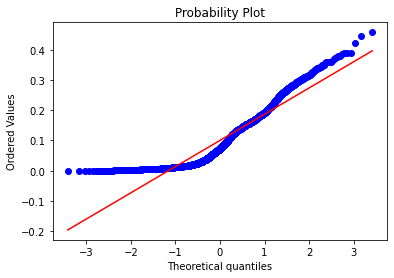

In [40]:
stats.probplot(p_values, plot=pylab)
pylab.show()

In [26]:
len(np.where(p_values < 0.05)[0])

918

In [27]:
len(test_vals)

2180

### Returning the original data point

In [28]:
def auth_type_un_df(user,n):
    auth_type_df = pd.DataFrame(index = list(authentication_data['Authent Type'].unique()))
    n = n
    auth_type_dict = {}
    
    for i in range(len(auth_start_days)-1):
        chunks = split_dataframe(authentication_data[auth_start_days[i]:auth_start_days[i+1]],n)
        for j in range(n):
                data = chunks[j]
                auth_type_data = data[data['UserName'] == user].groupby('Authent Type').size()
                auth_type_dict[i*n + j] = auth_type_df.index.to_series().map(auth_type_data.to_dict())
    
    auth_type_df = pd.DataFrame(data=auth_type_dict,index = list(authentication_data['Authent Type'].unique()))
    auth_type_df = auth_type_df.transpose()
    auth_type_df = auth_type_df.fillna(0)
    
    return auth_type_df

In [29]:
a_t = list(authentication_data['Authent Type'].unique())
AT_dict = { i : a_t[i] for i in range(0, len(a_t) ) }

In [30]:
# needs chunks function, usernames list, authentication data, authentication_start_days list, test-coords, authentication_dictionary

def orig_finder(entry_val,n):
    
    # gets the co-ordinates of the entry where we have the erro
    orig_co = test_coords[entry_val]
    
    # gets the authentication type
    authent = AT_dict[orig_co[1]]
    
    # gets the username of the individual who the anomaly occured with
    username = usernames[200+orig_co[2]]
    
    # gets the day the anomaly occured (n is the number of hours we split the data frame into)
    day = int(orig_co[0]/n)
    
    # gets the hour the anomaly occured in
    hour = orig_co[0] - n * day
    
    # gets the n hour chunks for that day
    chunks = split_dataframe(authentication_data[auth_start_days[day]:auth_start_days[day+1]],n)
    
    # gets the hour
    data = chunks[hour]
    
    # finds the anomaly
    anom = data[(data['UserName'] == username) & (data['Authent Type'] == authent)]
    
    return anom

In [32]:
frames = []
for i in range(2):
    df = orig_finder(2000+i,24)
    frames.append(df)
    
pd.concat(frames)

,UserName,SrcDevice,DstDevice,Authent Type,Failure,DailyCount
43720,User667501,Comp529760,Comp529760,TGS,0,8.0


In [35]:
authrt = pd.read_csv('../Data/AuthUserNames.txt', header=None)